In [1]:
!pip install konlpy
!pip install wordcloud

import os
import sys
import urllib.request
import json
import re
import konlpy
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import konlpy
from konlpy.tag import Okt
from collections import Counter
import pandas as pd
import konlpy.tag
import wordcloud

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
def get_blog():
    keyword = input('검색어를 입력하세요:')
    client_id = ""
    client_secret = ""

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []

In [3]:
def get_blog():
    keyword = input('검색어를 입력하세요:')
    client_id = "e2gIXSXV40rIetlpBV7q"
    client_secret = "z3lGnvhUOE"

    encText = urllib.parse.quote(keyword)

    tlist = []
    llist = []
    dlist = []



    for pagenum in range(1,1000,100):

        try:

            url = "https://openapi.naver.com/v1/search/blog?query=" + encText +"&display=100&sort=sim&start="+str(pagenum)
            # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
            request = urllib.request.Request(url)
            request.add_header("X-Naver-Client-Id",client_id)
            request.add_header("X-Naver-Client-Secret",client_secret)
            response = urllib.request.urlopen(request)
            rescode = response.getcode()
            if(rescode==200):
                response_body = response.read()
                print(response_body.decode('utf-8'))
                jtemp = response_body.decode('utf-8')
                jdata = json.loads(jtemp)
                jdata['items']
                
                for temp in jdata['items']:  
                    hangul = re.compile('[^ ㄱ-ㅎ|가-힣]+')
                    tdata = temp['title']
                    ldata = temp['link']
                    ddata = hangul.sub(r'',temp['description'])

                    tlist.append(tdata)
                    llist.append(ldata)
                    dlist.append(ddata)
                

            else:
                print("Error Code:" + rescode)

        except:
            print('Error')



    result = []
    for temp in range(len(tlist)):
        temp1 = []
        temp1.append(tlist[temp])
        temp1.append(llist[temp])
        temp1.append(dlist[temp])

        result.append(temp1)


    f = open('{0} - 네이버API 블로그검색.csv'.format(keyword) , 'w', encoding='utf-8')
    f.write('제목'+',' + '링크' + ',' + '내용' + '\n')
    for temp in result:    
        f.write(temp[0] + ',' + temp[1] + ',' + temp[2] +'\n')
    f.close()
    
    return result

In [4]:
def clean_str(s):
    hangul = re.compile('[^ㄱ-ㅎ|가-힣]+')
    s = hangul.sub(r' ',s)
    
    cp = re.compile("["
                     u"\U00010000-\U0010FFFF"
                     "]+", flags=re.UNICODE)
    s = cp.sub(r' ',s)
    
    return s.strip()

In [5]:
def get_text(data):
    result_text = ''
    for temp in data:
        result_text = result_text +' ' +  temp[2]

    return result_text

In [26]:
def Wordcloud(data , savename , maskname=''):
    noun_text = ''
    for word in data:
        noun_text = noun_text +' ' + word
    
    if maskname == '':
        wc = WordCloud(font_path='malgun.ttf' , max_font_size=60, colormap='PuOr_r').generate(noun_text)
    else:
        maskimg = np.array(Image.open(maskname))
        wc = WordCloud(font_path='malgun.ttf' , mask=maskimg, max_font_size=60, colormap='cool').generate(noun_text)
#     wc.generate_from_frequencies(data)
    plt.figure(figsize=(20,10))
    plt.imshow(wc)
    plt.tight_layout(pad=0)
    plt.axis('off')
    plt.show()
    wc.to_file('savename' + '.png')

In [7]:
bdata = get_blog()
rtext = get_text(bdata)

검색어를 입력하세요:노인보호구역
{
	"lastBuildDate":"Tue, 09 Aug 2022 13:51:11 +0900",
	"total":50133,
	"start":1,
	"display":100,
	"items":[
		{
			"title":"<b>노인보호구역<\/b> 범칙금 과태료 벌금  정리",
			"link":"https:\/\/blog.naver.com\/dudtjq8510?Redirect=Log&logNo=222842586055",
			"description":"<b>노인보호구역<\/b>은 교통약자 중에서 노인분들을 교통사고의 위험에서 보호할 수 있는 구역을 선정하여 안전한 통행을 보장하고자 만들어진 교통약자 보호구역 중 하나인데요 흔히 말하는 실버존 이라고... ",
			"bloggername":"디테일러 명 (천안 아산점)",
			"bloggerlink":"https:\/\/blog.naver.com\/dudtjq8510",
			"postdate":"20220809"
		},
		{
			"title":"<b>노인보호구역<\/b> 실버존(Silver zone)을 아시나요?",
			"link":"https:\/\/blog.naver.com\/polinlove2?Redirect=Log&logNo=222804573421",
			"description":"<b>노인보호구역<\/b>은 어린이 보호구역인 스쿨 처럼 교통약자인 어르신들을 보호하기 위해 설치된 구역이죠. 노인호보구역은 스쿨존과 달리 교통 표지판이 설치된 곳을 찾기 힘들어 그냥 지나치기 쉬운데요... ",
			"bloggername":"대한민국 경찰청",
			"bloggerlink":"https:\/\/blog.naver.com\/polinlove2",
			"postdate":"20220708"
		},
		{
			"title":"고령사회에 <b>노인보호구역<\/b>(Silver Zone)의 필요성",
			"link":"https:\/\/blog.naver.com

In [8]:
import pandas as pd
n = pd.read_csv('neg_pol_word.csv',encoding='cp949')
n

,부정단어
0,가난
1,가난뱅이
2,가난살이
3,가난살이하다
4,가난설음
...,...
9822,비리를
9823,의혹
9824,내팽개치다
9825,횡령


In [9]:
nag = list(n['부정단어'])
nag

['가난',
 '가난뱅이',
 '가난살이',
 '가난살이하다',
 '가난설음',
 '가난에',
 '가난에 쪼들려서',
 '가난하게',
 '가난하고',
 '가난하고 어렵다',
 '가난하고 천한',
 '가난하다',
 '가난하여',
 '가난한',
 '가난한 데다가',
 '가난한 사람을',
 '가난히',
 '가년스럽다',
 '가녕스럽다',
 '가누지 못하고',
 '가누지 못하다',
 '가누지 못할',
 '가누지 못할 정도로',
 '가누지 못함',
 '가눌 수 없게',
 '가눌 수 없을',
 '가눌 수 없이',
 '가당찮다',
 '가당찮이',
 '가두거나 해치거나',
 '가망이 없게',
 '가슴 아파하다',
 '가슴 아파함',
 '가슴 아프게',
 '가슴 아프고',
 '가슴 아프다',
 '가슴속에 근심이나',
 '가슴앓이',
 '가슴앓이하다',
 '가슴이 갑갑할',
 '가슴이 괴롭거나',
 '가슴이 그득한',
 '가슴이 답답하고',
 '가슴이 답답하다',
 '가슴이 답답하며',
 '가슴이 아프다',
 '가슴이 아픈',
 '가슴이 울렁거리는',
 '가슴이 울렁거리다',
 '가슴이 찢어질',
 '가엾고 불쌍하다',
 '가엾고 불쌍하여',
 '가엾고 불쌍한',
 '가엾고 불쌍함',
 '가엾고 애처롭다',
 '가음 아프고',
 '가짜',
 '가치 없는',
 '가치가 없다',
 '가치가 없을',
 '가치가 없이',
 '가치없는',
 '가혹하게',
 '가혹하게 착취하여',
 '간 장애',
 '간사한 짓을',
 '감금하여',
 '감정의 불화',
 '강간죄',
 '강개무량',
 '강개무량하다',
 '강제로 누르다',
 '강제로 누름',
 '강제로 빼앗아',
 '강제적으로',
 '강탈',
 '강탈하다',
 '강한 비판이나',
 '개짓하다',
 '거만스럽게',
 '거만을',
 '거만을 떠는',
 '거만을 떨다',
 '거만하게',
 '거만하게 행동하는',
 '거만하게 행동하다',
 '거만하고',
 '거만하다',
 '거만한 태도로',
 '거부감',
 '거부하거나',
 '거북스럽게',
 '거

In [11]:
p = pd.read_csv('pos_pol_word.csv',encoding='cp949')
pos = []
pos = list(p['긍정단어'])
pos

['(-;',
 '(^^)',
 '(^-^)',
 '(^^*',
 '(^_^)',
 '(^o^)',
 '*^^*',
 '/^o^\\',
 ':(',
 ":'-(",
 ':-(',
 ':-)',
 ':|',
 ';',
 ';)',
 ';-)',
 '^///^',
 '^^',
 '^^//',
 '<3',
 '=)',
 'XD',
 'ㄱㅅ',
 'ㄱㅇㄷ',
 '가격이 싸다',
 '가까이 사귀어',
 '가까이하다',
 '가다듬어',
 '가다듬어 수습하는',
 '가다듬어 수습하다',
 '가다듬어 정하다',
 '가당히',
 '가뜬하게',
 '가라앉혀 바로잡다',
 '가르치며',
 '가르침',
 '가벼운 마음으로',
 '가볍게 웃다',
 '가볍고',
 '가볍고 보드랍게',
 '가분가분',
 '가분히',
 '가뿐가뿐',
 '가뿐가뿐하다',
 '가뿐가뿐히',
 '가뿐하게',
 '가뿐하다',
 '가뿐한',
 '가뿐한 느낌',
 '가뿐한 느낌이',
 '가뿐히',
 '가장 중요한',
 '가지런하게 하는',
 '가지런하게 하다',
 '가지런하다',
 '가치',
 '가치가',
 '가치있는',
 '각별나다',
 '각별하다',
 '간직하다',
 '감각적이다',
 '감당하다',
 '감동시킬',
 '감동시킬 만한',
 '감모',
 '감싸고',
 '감정이 북받쳐',
 '강렬하게',
 '강세',
 '강인하다',
 '강하게',
 '강하게 하다',
 '강하고',
 '강하다',
 '강화하다',
 '갖추다',
 '개선하고',
 '개성',
 '개성있는',
 '개성있다',
 '갠소',
 '갸륵한',
 '갸륵한 데가',
 '갸름하다',
 '거리낌 없이',
 '거짓 없다',
 '거짓없다',
 '거침없이',
 '거침이 없는',
 '걱정이 없는',
 '건강에 긍정적인',
 '건둥건둥',
 '건둥건둥하다',
 '검소하다',
 '겉면이 매끄럽고',
 '겉모양의 아름다움과',
 '격려되다',
 '격려하다',
 '격식에 맞아',
 '견고하다',
 '견디어 내다',
 '견줄 수 없을 정도로',
 '결점이 없도록',
 '겸

In [35]:
stopwords = ['스쿨존','보호','구역','노인','어린이','등','교통','곳','지정','안전','사업','일','시설','위해','및','년','장애인','위','경로당','설치','주변',
            '환경','도로','시','유치원','이번','중','조례','복지','차량','올해','애인','개','개소','억','관내',
            '의원','전국','발생','추가','이','물','월','원','내','현재','광주','리','지역','최근','대전','것','지난해','초등학교','관','인구',
            '존','완료','대한','투입','공단','기자','대해','지난','마을','로','수','총','시행','조성','추진','공원','경찰정','경찰','충남',
            '회','또','군','신규','계획','안','광주시','시스템','생활','활동','중구','어르신','실버','서울시회관','경우','통행','기준','어린이집',
            '진행','구','경기도','만','복지관','아산시','대책','기관','인근','행사','점검','부과','지원','대폭','도시','억원','횡단보도','전통','도',
            '서울시','시장','회관','운영','가운데','윤','민주당','공사','제조','요양원','개정','이상','규칙','고','지자체','앞','억만원','운전','출처',
            '학교','일자리','만원','도로교통법','미끄럼','주간','주민','금','일반','표시','센터','오늘', '점심식사', '오후',
            '이하', '시간', '배', '다한', '해당', '또한', '장소', '직업', '분', '점', '알','때','잡곡','알때', '이하', '요', '일정', '포함', '진짓','령', '정', '모두', '밥', '종합', '내용', '우리', '여가', '자주','말','때']


for i in stopwords:
    pos.append(i)

In [13]:
def get_tags(text, ntags=50):
    spliter = Okt()
    nouns = spliter.nouns(text)
    count = Counter(nouns)
    words = dict(count.most_common(ntags))
    
    #불용어 사전안에 있으면 삭제
    for i in pos:
        if i in words:
            del words[i]
    return words


In [36]:
rtags = get_tags(rtext, ntags=200)

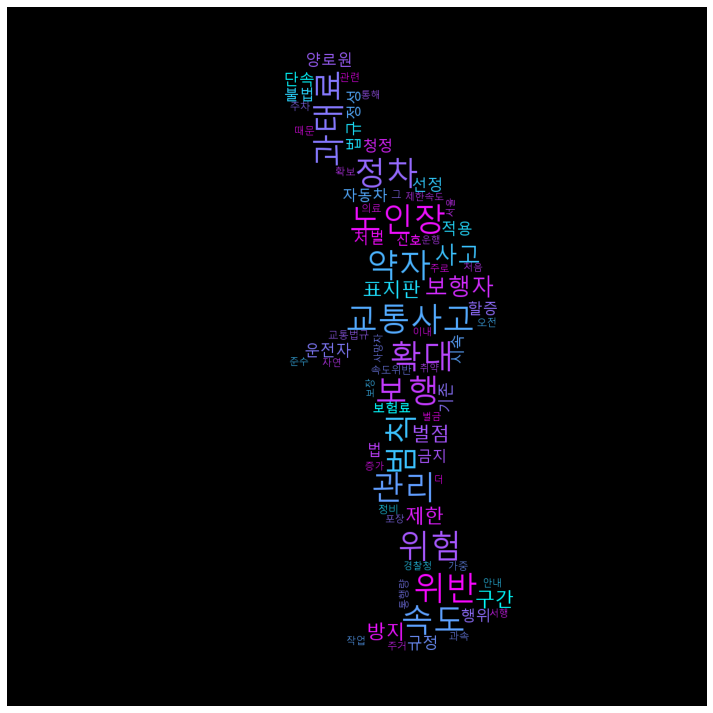

In [37]:
Wordcloud(rtags, '노인보호구역','mask1.jpg')